In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import torch
torch.cuda.set_device(1)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
name = 'vit_base_patch16_384'

In [5]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [6]:
scaler = MinMaxScaler()

In [7]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [8]:
dftrain = df[(df.dataset=='train')]
# dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
# dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])        
# dftest.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])                   

In [9]:
dftrain = pd.concat([dftrain,dfvalid])

In [10]:
df = pd.concat([dftrain,dftest])

In [11]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [12]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [13]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname=name+'_all_new'), #convnext_yield_all_minmax
    # ReduceLROnPlateau()
]

In [14]:
from fastai.metrics import mae,rmse,mse

In [15]:
db = DataBlock(blocks = (ImageBlock,CategoryBlock(),CategoryBlock(),CategoryBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/'),
                        ColReader('species'),
                        ColReader('water_treatment'),
                        ColReader('management'),
                        ColReader('plot m2'),
                        ColReader('avg_water (L m-2)'),
                        ColReader('N (kg microplot-1)'),
                        ColReader('P (kg microplot-1)'),
                        ColReader('K (kg microplot-1)'),
                        ColReader('avg_height'),
                        ColReader('GA'),
                        ColReader('GGA'),
                        ColReader('CSI'),
                        ColReader('NGRDIveg'),
                        ColReader('TGIveg')
                       ],
                 get_y=[ColReader('final yield (kg)')],
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=15)
dls = db.dataloaders(dftrain,bs=2)

In [16]:
class MultiInputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = 1
    self.body = body
    self.image = create_head(nf, 10)
    self.combine = nn.Sequential(
            nn.Linear(in_features=24, out_features=1, bias=False)
        )
    
    
  
  def forward(self, x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14):
    y = self.body(x0)
    y = self.image(y)
    final_yield = self.combine(torch.cat([y,torch.reshape(x1,(x1.shape[0],1)),
                                     torch.reshape(x2,(x2.shape[0],1)),
                                     torch.reshape(x3,(x3.shape[0],1)),
                                     torch.reshape(x4,(x4.shape[0],1)),
                                     torch.reshape(x5,(x5.shape[0],1)),
                                     torch.reshape(x6,(x6.shape[0],1)),
                                     torch.reshape(x7,(x7.shape[0],1)),
                                     torch.reshape(x8,(x8.shape[0],1)),
                                     torch.reshape(x9,(x9.shape[0],1)),
                                     torch.reshape(x10,(x10.shape[0],1)),
                                     torch.reshape(x11,(x11.shape[0],1)),
                                     torch.reshape(x12,(x12.shape[0],1)),
                                     torch.reshape(x13,(x13.shape[0],1)),
                                     torch.reshape(x14,(x14.shape[0],1))],1))
    return final_yield

In [17]:
model = timm.create_model(name,num_classes=1,pretrained=True)
body = nn.Sequential(*list(model.children())[:-1])
net = MultiInputModel(body)

In [18]:
learn = Learner(dls, net, loss_func=MSELossFlat(), metrics=[mae,rmse,mse],cbs=callbacks)

In [19]:
# learn.lr_find()

In [20]:
learn.freeze()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,42180.796875,53806.519531,210.899582,231.962326,53806.519531,00:16
1,38604.953125,44893.707031,192.621719,211.881348,44893.707031,00:16
2,31047.250000,34631.640625,165.502777,186.095779,34631.640625,00:16
3,25051.132812,27303.810547,141.515717,165.238647,27303.810547,00:17
4,21584.525391,23034.535156,128.438812,151.771332,23034.535156,00:16
5,17783.929688,19646.785156,117.157600,140.166992,19646.785156,00:16
6,14296.714844,15684.710938,105.392845,125.238609,15684.710938,00:16
7,11272.714844,11312.314453,88.644356,106.359367,11312.314453,00:16
8,8204.149414,11508.867188,95.144272,107.279388,11508.867188,00:17
9,5533.411621,4993.153320,59.233761,70.662254,4993.153320,00:16


Better model found at epoch 0 with valid_loss value: 53806.51953125.


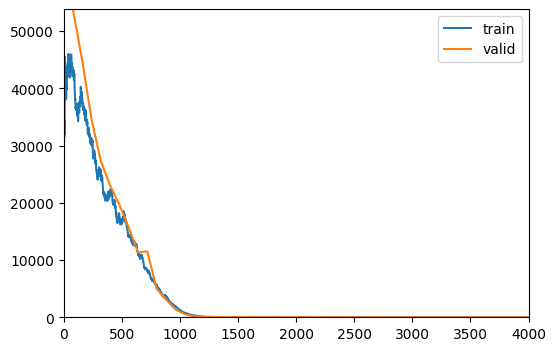

Better model found at epoch 1 with valid_loss value: 44893.70703125.
Better model found at epoch 2 with valid_loss value: 34631.640625.
Better model found at epoch 3 with valid_loss value: 27303.810546875.
Better model found at epoch 4 with valid_loss value: 23034.53515625.
Better model found at epoch 5 with valid_loss value: 19646.78515625.
Better model found at epoch 6 with valid_loss value: 15684.7109375.
Better model found at epoch 7 with valid_loss value: 11312.314453125.
Better model found at epoch 9 with valid_loss value: 4993.1533203125.
Better model found at epoch 10 with valid_loss value: 3154.4833984375.
Better model found at epoch 11 with valid_loss value: 1407.27490234375.
Better model found at epoch 12 with valid_loss value: 559.4105834960938.
Better model found at epoch 13 with valid_loss value: 148.2483367919922.
Better model found at epoch 14 with valid_loss value: 62.3359489440918.
Better model found at epoch 15 with valid_loss value: 47.73964309692383.
Better model f

In [21]:
learn.fit_one_cycle(50,lr_max=1e-3)

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,5.164837,6.955994,2.156032,2.637422,6.955994,00:16
1,5.319758,7.019965,2.161173,2.649522,7.019965,00:16
2,5.460162,6.802388,2.139650,2.608139,6.802388,00:16
3,5.499025,6.713015,2.144692,2.590949,6.713015,00:16
4,5.319453,6.815665,2.139104,2.610683,6.815665,00:16
5,5.473779,6.723693,2.137779,2.593009,6.723693,00:16
6,5.339939,6.618274,2.118296,2.572601,6.618274,00:16
7,5.282943,7.664905,2.248562,2.768556,7.664905,00:17
8,5.720882,6.980249,2.220451,2.642016,6.980249,00:16
9,5.282952,6.721536,2.113125,2.592593,6.721536,00:16


Better model found at epoch 0 with valid_loss value: 6.95599365234375.


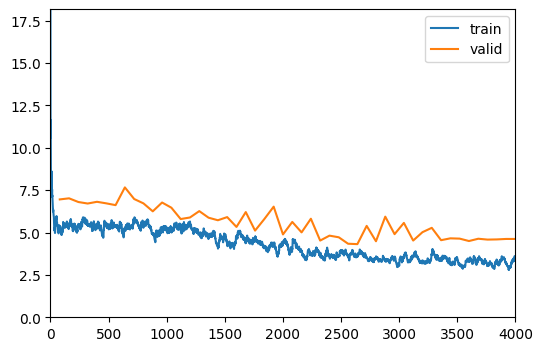

Better model found at epoch 2 with valid_loss value: 6.8023881912231445.
Better model found at epoch 3 with valid_loss value: 6.713015079498291.
Better model found at epoch 6 with valid_loss value: 6.618274211883545.
Better model found at epoch 10 with valid_loss value: 6.253118515014648.
Better model found at epoch 13 with valid_loss value: 5.797341823577881.
Better model found at epoch 17 with valid_loss value: 5.7260518074035645.
Better model found at epoch 19 with valid_loss value: 5.331636905670166.
Better model found at epoch 21 with valid_loss value: 5.115612030029297.
Better model found at epoch 24 with valid_loss value: 4.8895697593688965.
Better model found at epoch 28 with valid_loss value: 4.52724552154541.
Better model found at epoch 31 with valid_loss value: 4.34067440032959.
Better model found at epoch 32 with valid_loss value: 4.317145347595215.


In [23]:
learn.fit_one_cycle(50,lr_max=1e-4)

In [24]:
dls = db.dataloaders(df,bs=4)
learn.dls=dls

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
preds,gt = learn.get_preds()

In [27]:
mean_absolute_error(gt,preds)

2.2792494

In [28]:
mean_squared_error(gt,preds)

6.6465116

In [29]:
math.sqrt(mean_squared_error(gt,preds))

2.5780829223898167